In [1]:
from PIL import Image
from torch.utils.data import Dataset, DataLoader
import torchvision.transforms as transforms
import matplotlib.pyplot as plt
import sys
sys.dont_write_bytecode = True


In [2]:
data_dir = r"/home/ychen921/808E/final_project/Dataset/Overfit"

data_transform = transforms.Compose([
        transforms.Resize((256, 256)),  # Resize images to 256x256
        transforms.ToTensor()            # Convert images to tensors
    ])

In [3]:
def show_image_pair(image1, image2):
    fig, axs = plt.subplots(1, 2, figsize=(10, 5))
    axs[0].imshow(image1.permute(1, 2, 0))  # Convert tensor back to PIL Image format for display
    axs[0].axis('off')
    axs[0].set_title('Fixed')
    axs[1].imshow(image2.permute(1, 2, 0))
    axs[1].axis('off')
    axs[1].set_title('Moving')
    plt.show()

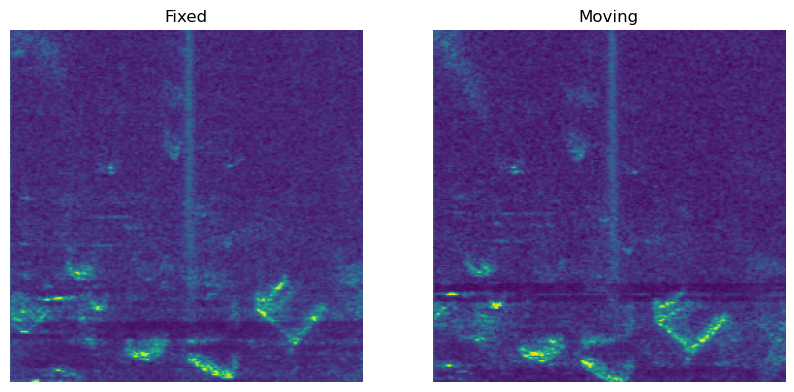

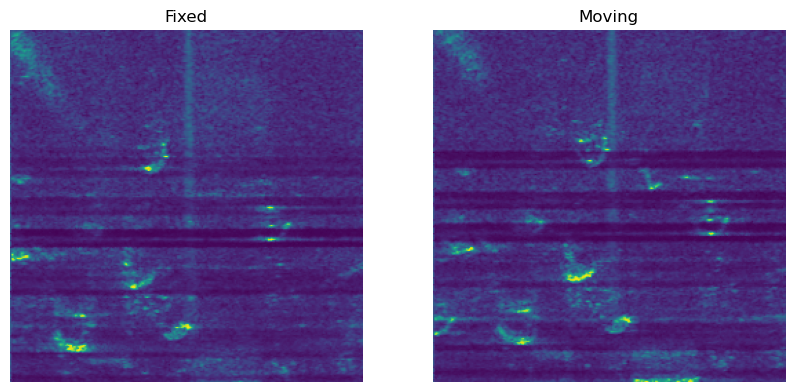

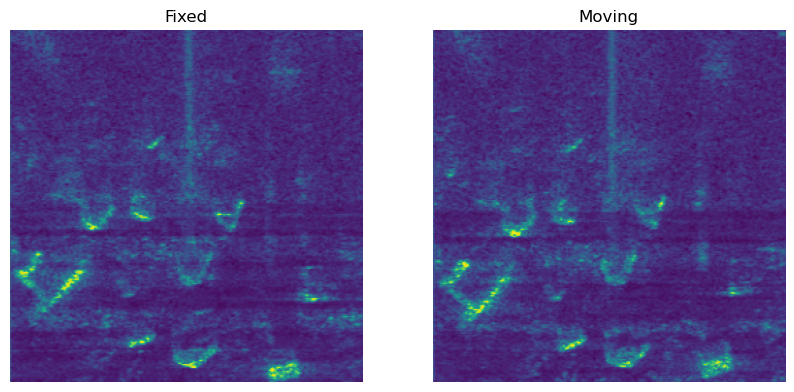

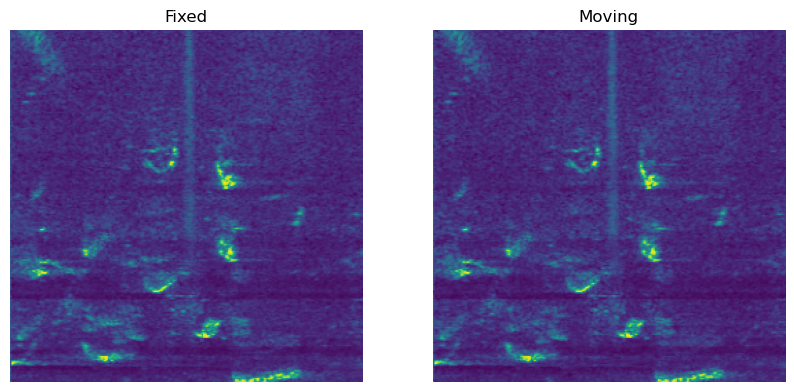

In [4]:
from DataReader import SonarPairDataset

image_pair_dataset = SonarPairDataset(data_folder=data_dir, transform=data_transform)
batch_size = 4
data_loader = DataLoader(image_pair_dataset, batch_size=batch_size, shuffle=True)

for batch in data_loader:
    images1, images2 = batch
    for i in range(batch_size):
        # print(fixed_img_name[i], moving_img_name[i])
        show_image_pair(images1[i], images2[i])
    break